In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_csv(r"C:\Users\Prakash Enerprener\OneDrive\Desktop\data science\linear recuresion\car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
len(df)

301

In [7]:
len(df.columns)

9

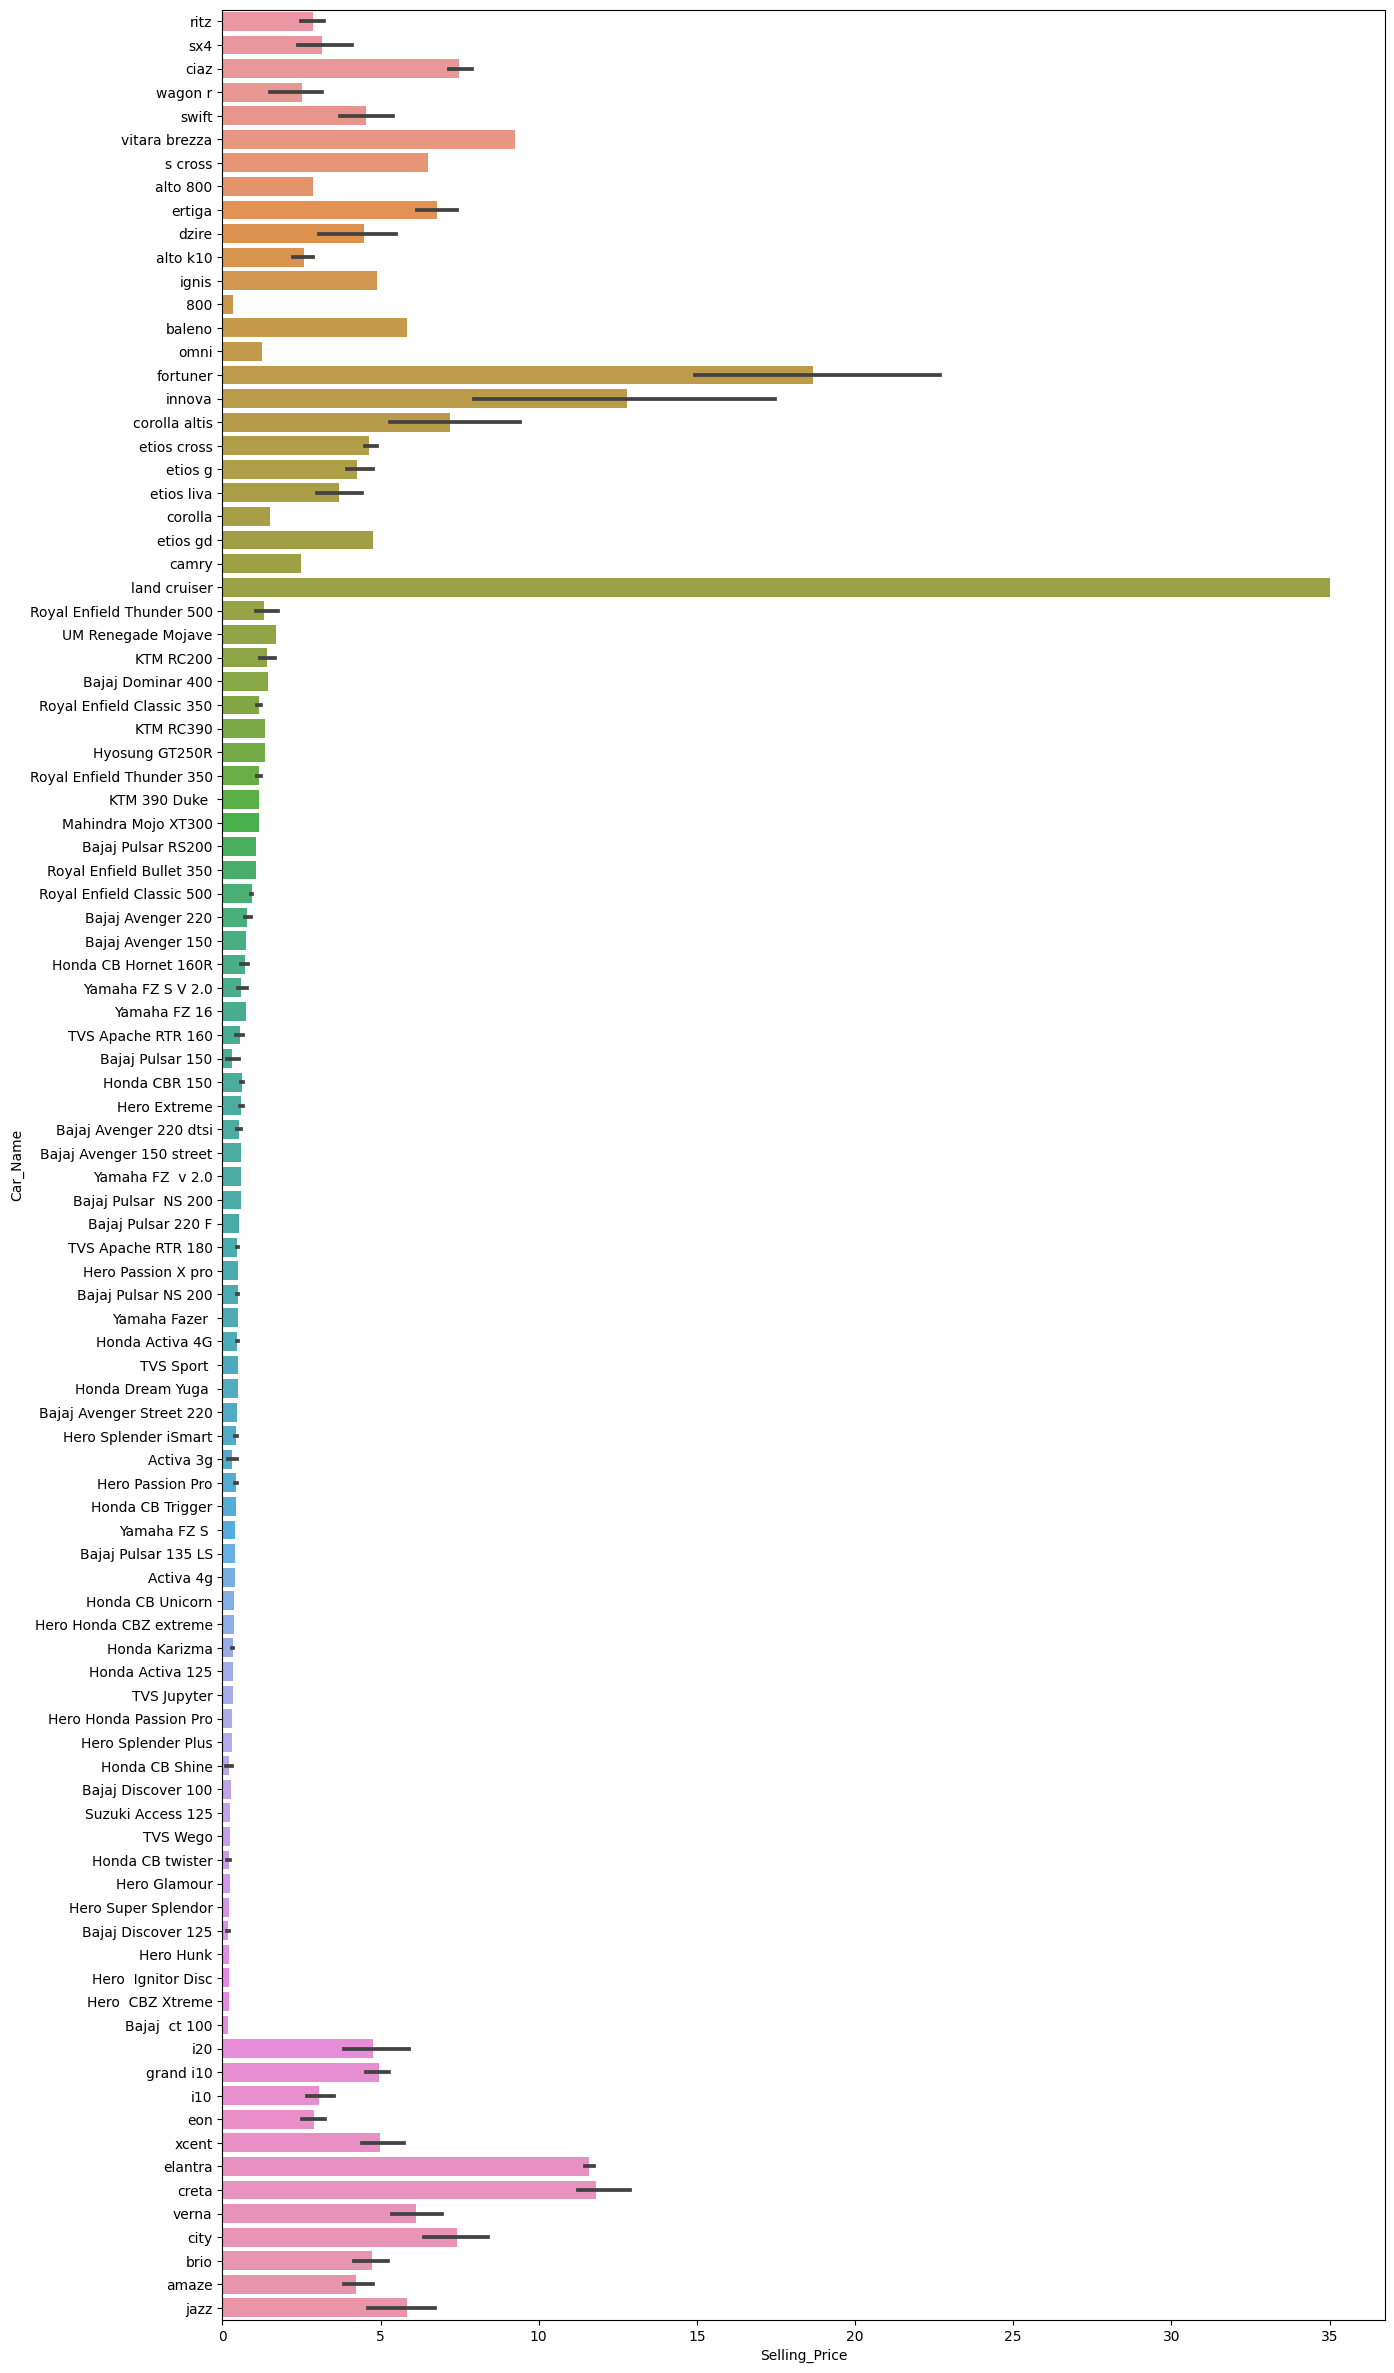

In [8]:
plt.figure(figsize=(15,30))
sns.barplot(data=df,y='Car_Name',x='Selling_Price')
plt.show()

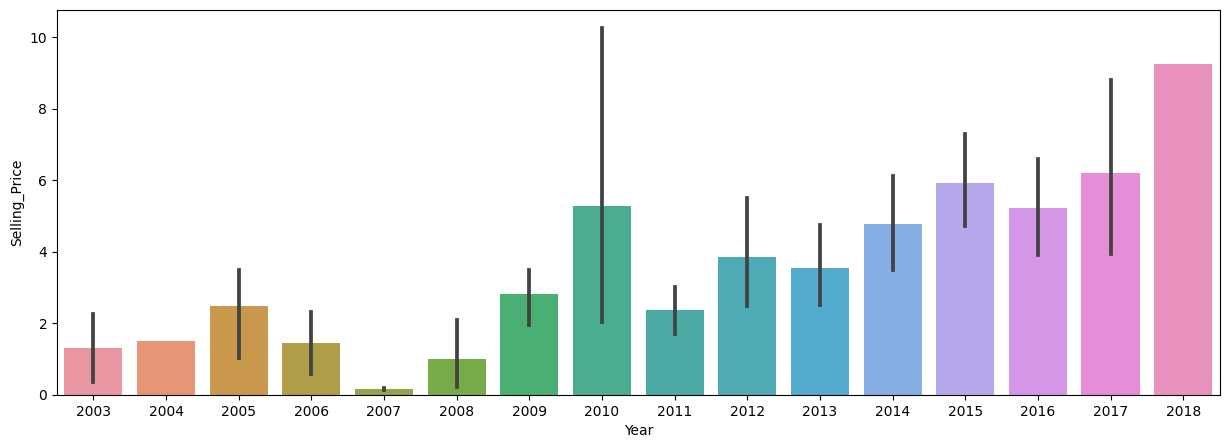

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,y='Selling_Price',x='Year')
plt.show()

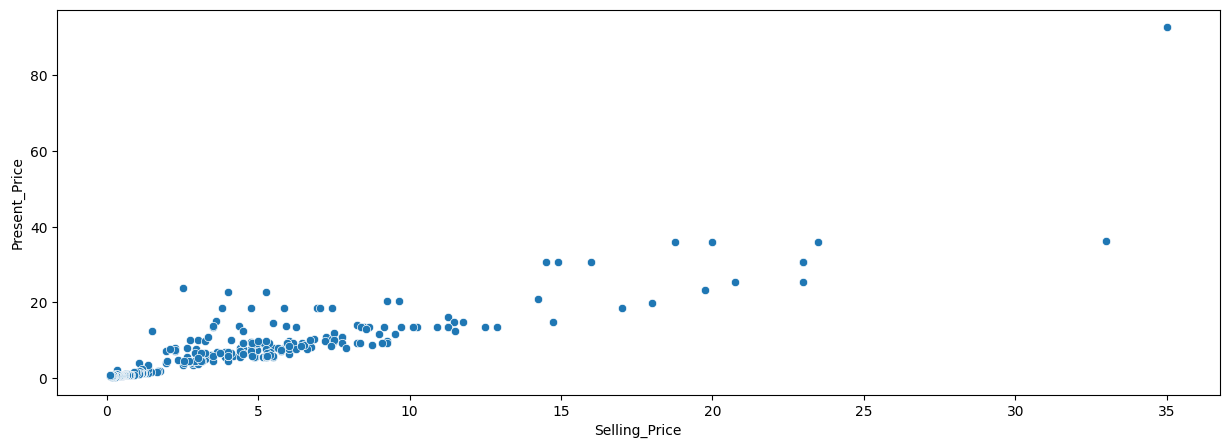

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,y='Present_Price',x='Selling_Price')
plt.show()

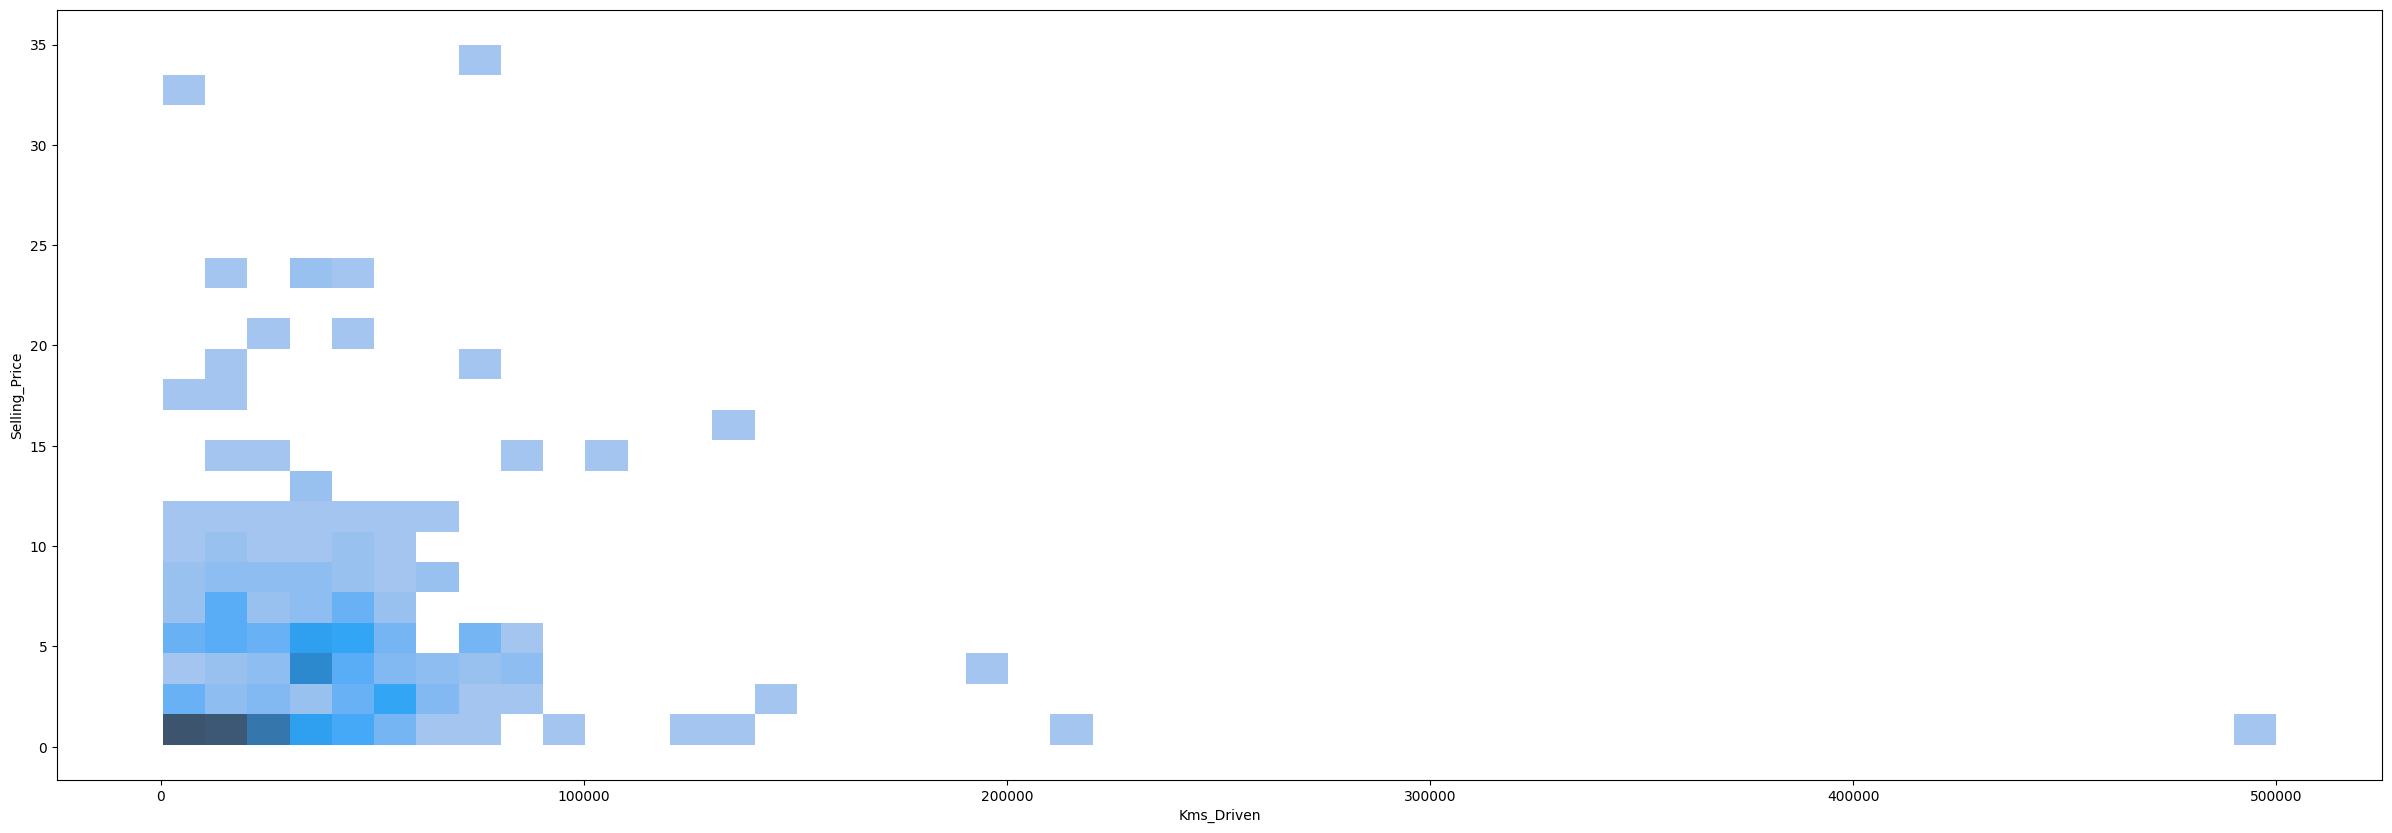

In [11]:
plt.figure(figsize=(30,10))
sns.histplot(data=df,y='Selling_Price',x='Kms_Driven')
plt.show()

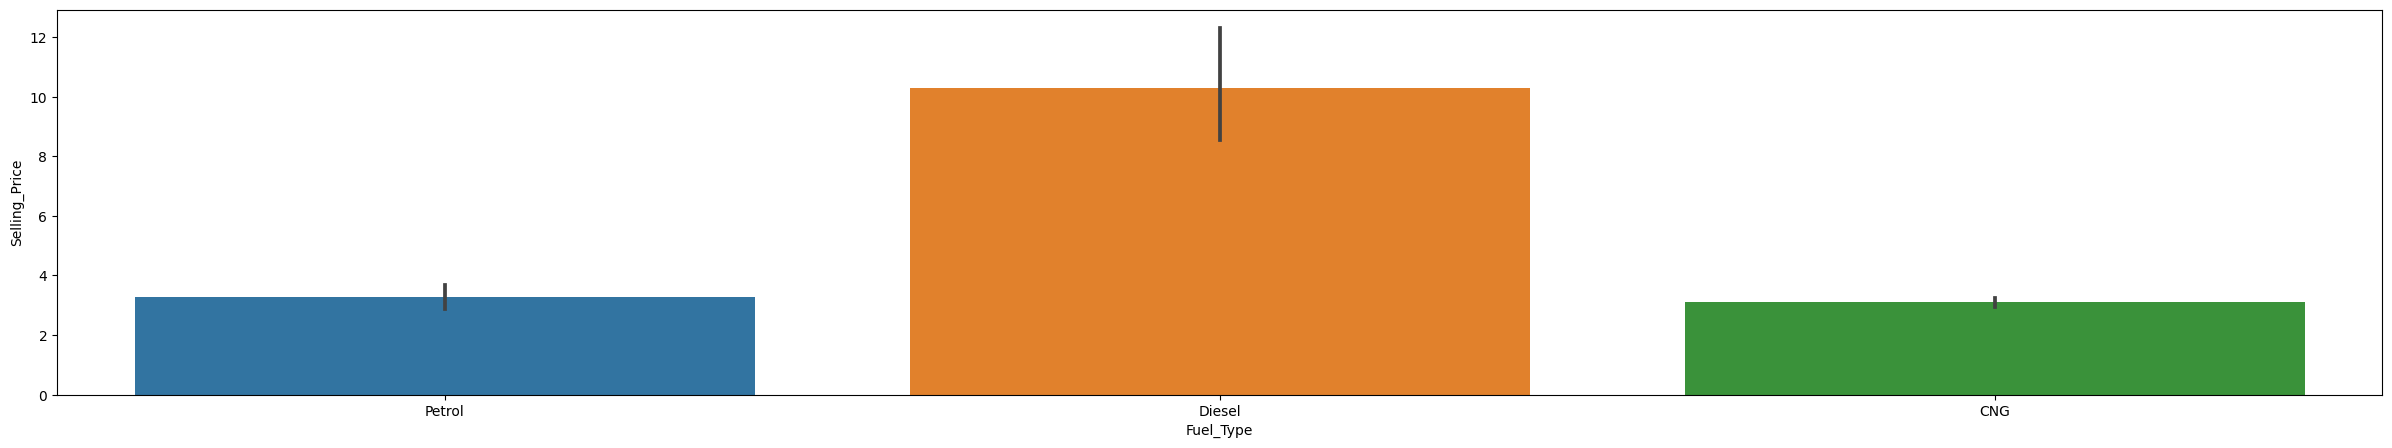

In [12]:
plt.figure(figsize=(30,5))
sns.barplot(data=df,y='Selling_Price',x='Fuel_Type')
plt.show()

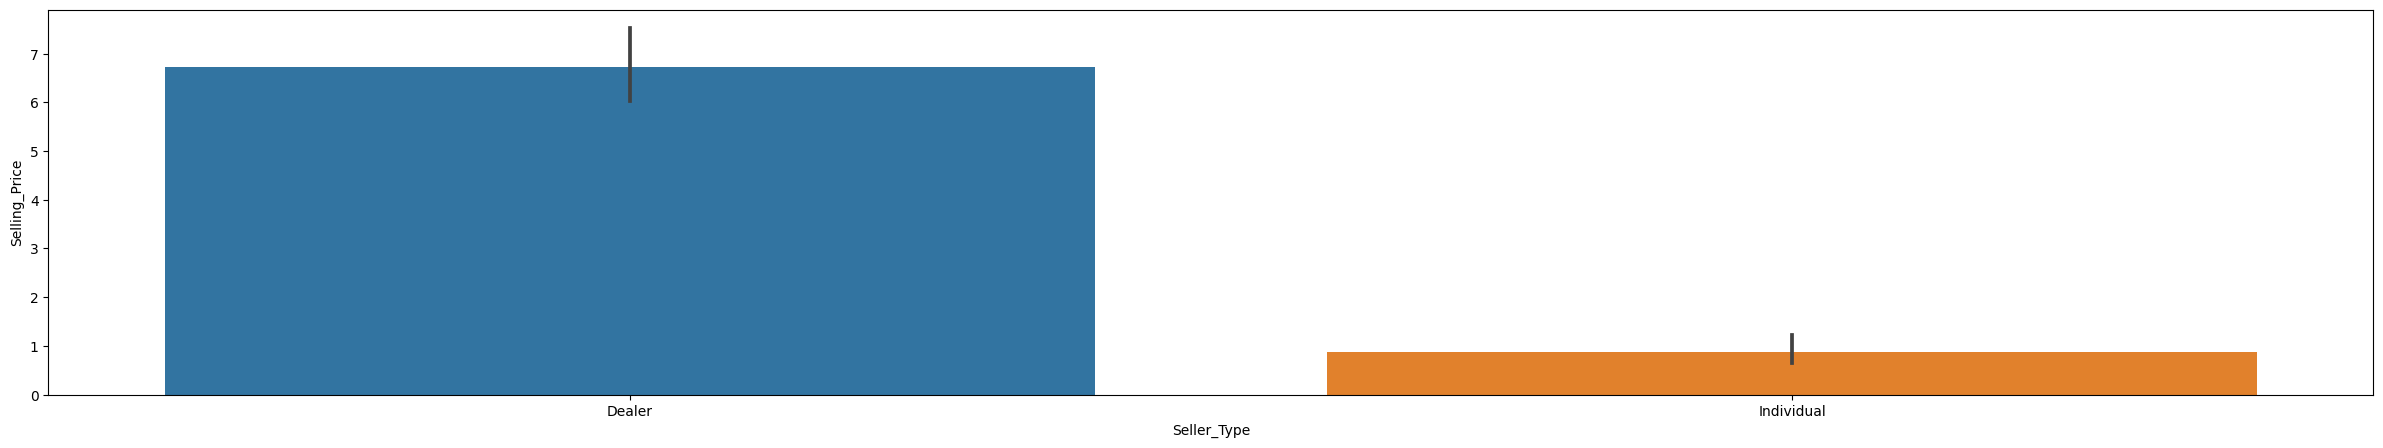

In [13]:
plt.figure(figsize=(30,5))
sns.barplot(data=df,y='Selling_Price',x='Seller_Type')
plt.show()

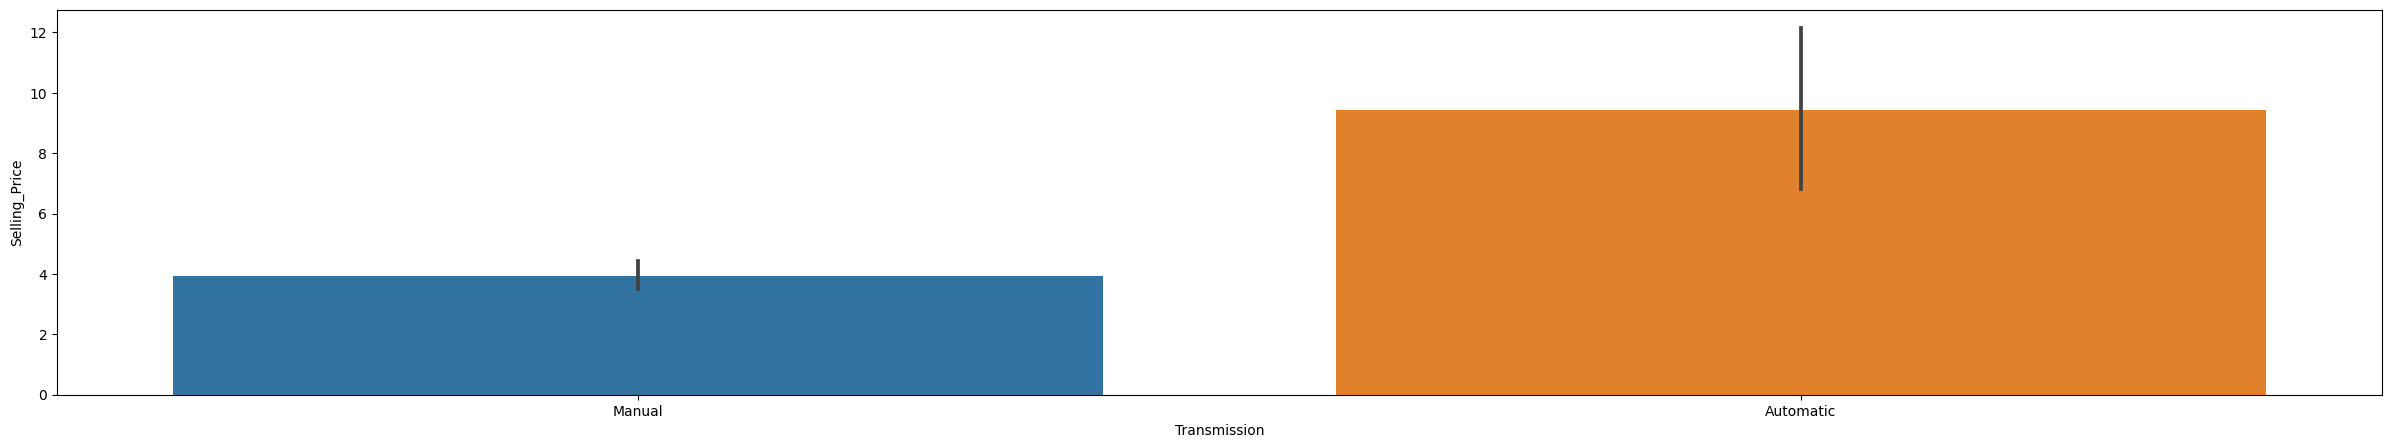

In [14]:
plt.figure(figsize=(30,5))
sns.barplot(data=df,y='Selling_Price',x='Transmission')
plt.show()

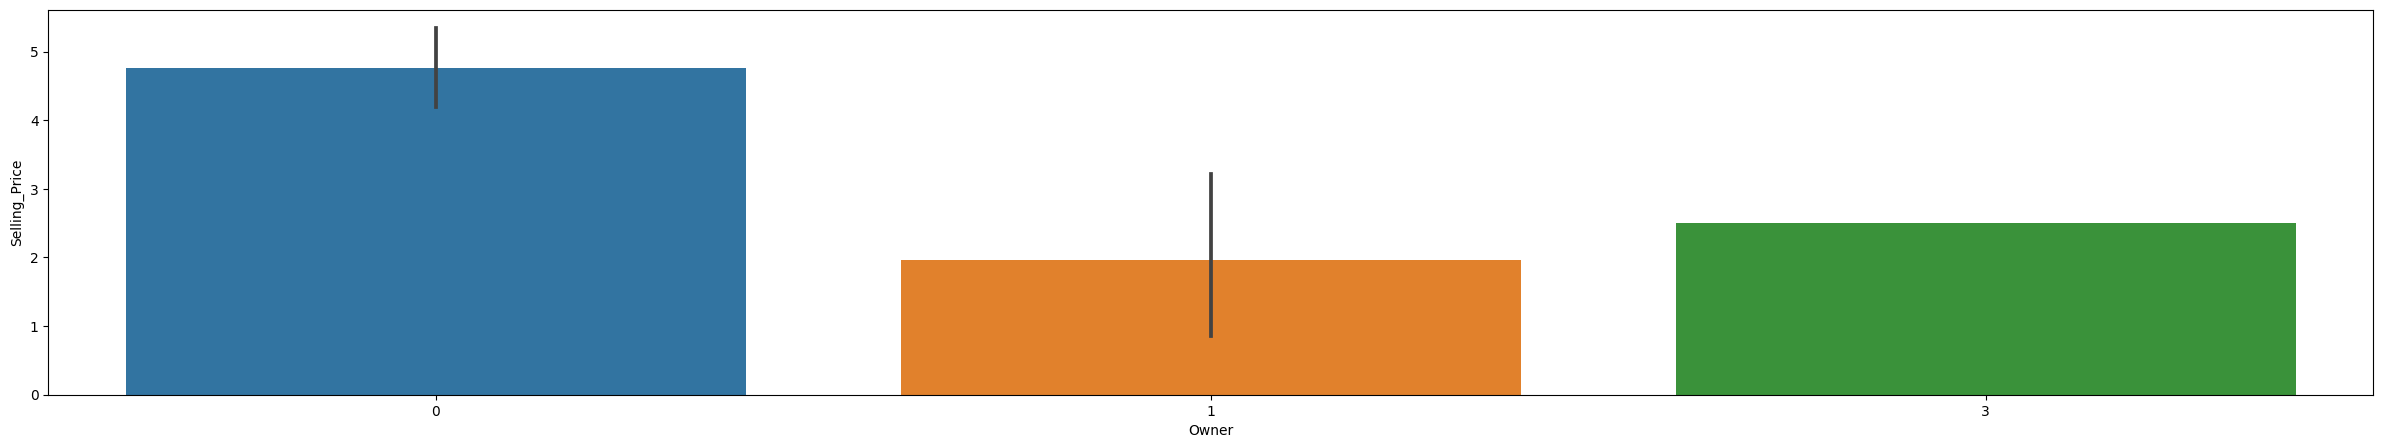

In [15]:
plt.figure(figsize=(30,5))
sns.barplot(data=df,y='Selling_Price',x='Owner')
plt.show()

In [16]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [17]:
df.isnull().sum()/len(df)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [18]:
# Separating the numerical and categorical columns
def data_type(df):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(df, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.codes
    return df

df = encoding(df, categorical)

In [339]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


In [340]:
x = df.iloc[:,[0,1,3,4,5,6,7,8]]

In [341]:
y=df.iloc[:,2]

In [342]:
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [343]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [344]:
x.shape

(301, 8)

In [345]:
y.shape

(301,)

In [346]:
x.ndim

2

In [347]:
y.ndim

1

In [348]:
#y=y.reshape(-1,1)

In [349]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [350]:
x_train.shape


(210, 8)

In [351]:
x_test.shape

(91, 8)

In [284]:
from sklearn.linear_model import LinearRegression
regressor_ini = LinearRegression()
model1=regressor_ini.fit(x_train, y_train)
y_pred=model1.predict(x_test)

In [285]:
y_test

150     0.50
198     0.15
110     1.20
290     4.50
74      4.90
       ...  
69     14.25
144     0.60
109     1.20
93     23.00
58      4.10
Name: Selling_Price, Length: 91, dtype: float64

In [286]:
y_pred

array([-0.51131316, -1.55112173,  2.19388767,  4.31140869,  6.41391529,
        5.7602048 ,  6.42045082,  7.33754495,  7.68851288,  5.19472694,
        2.40911188,  4.46397603,  1.87552256,  2.68601252,  1.33187065,
        4.8926896 ,  5.07901487,  7.85588843,  3.83116546,  4.55872282,
        0.30870264, -0.24648539,  2.17007494,  4.36279891,  0.38144261,
        1.25778743, -0.20925677, -3.84823914,  9.06001068,  1.44620139,
        4.54487114,  1.73400306,  7.59826854,  1.55914313,  1.88342356,
        2.65418328, -0.58032344,  5.37121501,  5.75350907,  4.35076102,
        3.22916967,  0.65927164,  7.10933331,  1.04175383,  4.67004823,
        2.23685779,  9.56763686, 14.1142491 ,  1.89743454, -0.11935549,
       -1.05640444,  7.43717837,  5.64457533,  5.00785802, 16.55961913,
        3.96718069,  4.36196738,  2.92224757,  4.95463393,  1.06886114,
        6.58500131,  4.1076234 ,  5.87929521, 19.70771138,  3.604252  ,
        6.49863041,  8.30653528,  3.98341127,  7.7883832 ,  1.54

In [287]:
coefficients = model1.coef_

In [288]:
coefficients

array([-3.16461672e-03,  4.51690185e-01,  4.35119223e-01, -4.30271013e-06,
       -1.31816843e+00, -1.13620737e+00, -1.36446815e+00, -9.36553356e-01])

In [289]:
model1.intercept_

-903.8922943305884

In [290]:
regressor_ini_R2 = model1.score(x_train, y_train)
print('R^2: {0}'.format(regressor_ini_R2))

R^2: 0.8730609457445806


In [291]:
from sklearn import metrics
MAE=round(metrics.mean_absolute_error(y_test,y_pred),2)
MSE=round(metrics.mean_squared_error(y_test,y_pred),2)


In [292]:
#import math.sqrt as mp
RMSE=round(np.sqrt(MSE),2)

In [293]:
metrics = {
    'MAE': MAE,
    'MSE': MSE,
    'RMSE': RMSE
}

In [294]:
df_metrics = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])

# Display the DataFrame
print(df_metrics)

  Metric  Value
0    MAE   1.11
1    MSE   2.47
2   RMSE   1.57


In [295]:
import statsmodels.api as sm

In [296]:
x_train = np.append(arr=x_train, values = np.ones((210,1)).astype(int), axis=1)

In [297]:
regressor_ini = sm.OLS(endog=y_train, exog=x_train).fit()

In [298]:
regressor_ini.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     172.8
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           9.78e-86
Time:                        08:48:04   Log-Likelihood:                -428.97
No. Observations:                 210   AIC:                             875.9
Df Residuals:                     201   BIC:                             906.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0032      0.009     -0.339      0.735      -0.022       0.015
x2             0.4517      0.056      8.049      0.000       0.341       0.562
x3             0.4351      0.018     23.819      0.000       0.399       0.471
x4         -4.303e-06   3.69e-06     -1.165      0.246   -1.16e-05    2.98e-06
x5            -1.3182      0.345     -3.825      0.000      -1.998      -0.639
x6            -1.1362      0.494     -2.300      0.022      -2.110      -0.162
x7            -1.3645      0.403     -3.382      0.001      -2.160      -0.569
x8            -0.9366      0.563     -1.663      0.098      -2.047       0.174
const       -903.8923    113.241     -7.982      0.000   -1127.184    -680.600
==============================================================================
Omnibus:                       82.506   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.884
Skew:                           1.297   Prob(JB):                    1.35e-133
Kurtosis:                      10.950   Cond. No.                     5.04e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [299]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [300]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


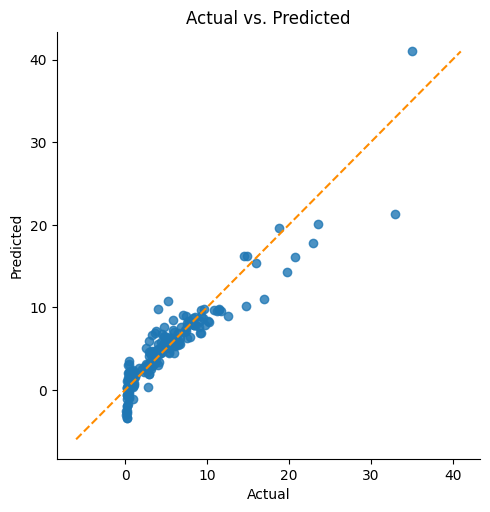

In [301]:
linear_assumption(regressor_ini, x_train, y_train)

In [335]:
x_train.ndim

2

In [337]:
x_train.shape

(210, 9)

In [304]:
y_train.ndim

1

In [266]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.9849219834114636e-16
Residuals are not normally distributed


C:\Users\Prakash Enerprener\anaconda4\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Prakash Enerprener\AppData\Local\Temp\ipykernel_14732\965784447.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


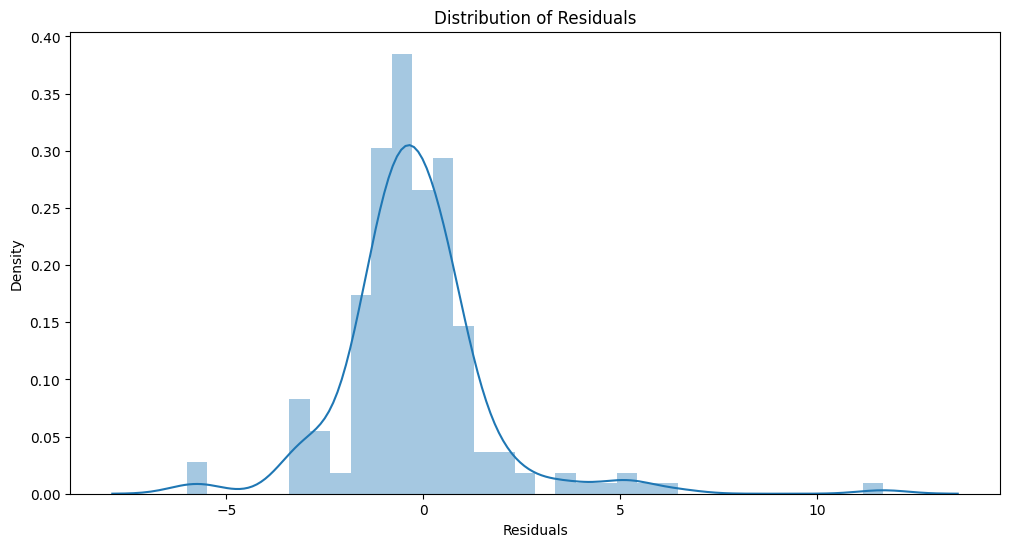


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [352]:
normal_errors_assumption(model1, x_train, y_train)

In [353]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


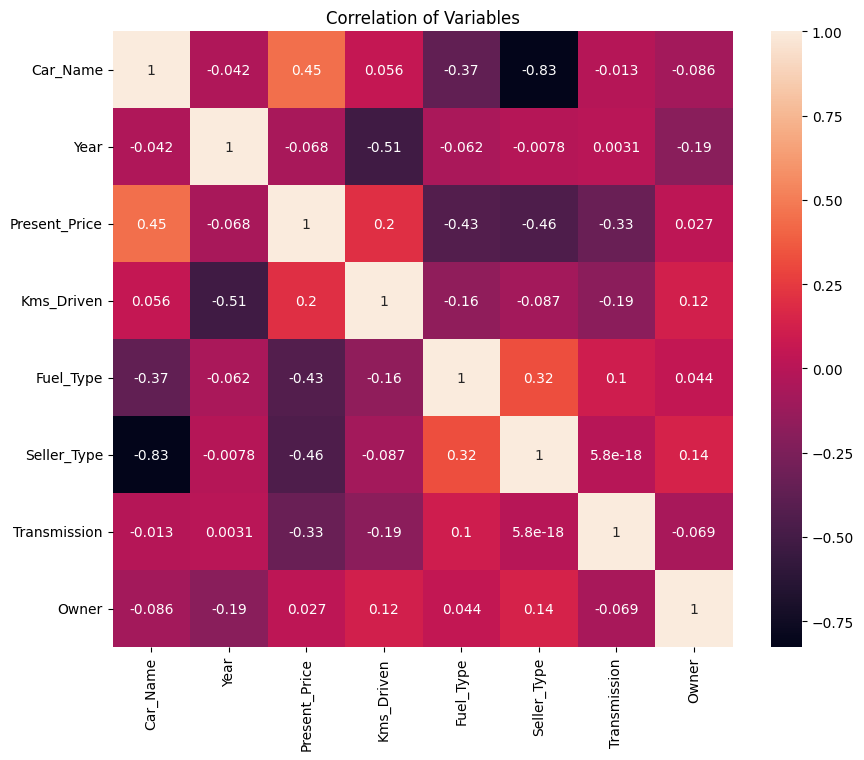

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Car_Name: 23.84495841619095
Year: 79.13479239384901
Present_Price: 2.8829536152285744
Kms_Driven: 1.9540478518598827
Fuel_Type: 25.63540938358974
Seller_Type: 5.035982579176508
Transmission: 7.528737094477084
Owner: 1.080823525544665

3 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [357]:
multicollinearity_assumption(model1, x_train, y_train, df.iloc[:,[0,1,3,4,5,6,7,8]].columns.values)

In [358]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [359]:
autocorrelation_assumption(model1, x_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.2025857170911327
Little to no autocorrelation 

Assumption satisfied


C:\Users\Prakash Enerprener\anaconda4\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [362]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


C:\Users\Prakash Enerprener\anaconda4\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


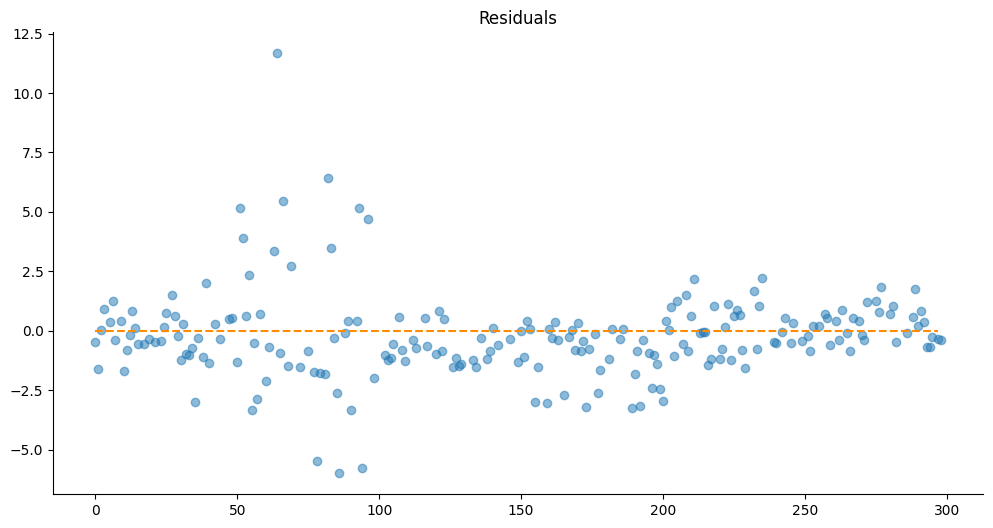

In [363]:
homoscedasticity_assumption(model1, x_train, y_train)